<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/Kalman_filter_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade quantecon

     |████████████████████████████████| 235kB 2.7MB/s 


In [2]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## Exercise 1

In [3]:
x_hat = 8
sigma = 1
theta = 10
nmea = 5

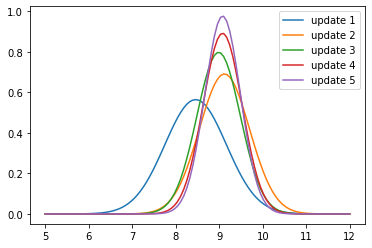

In [4]:
ss = qe.LinearStateSpace(1, 0, 1, 1, mu_0=theta)
kf = qe.Kalman(ss, x_hat, sigma)
x = np.linspace(5, 12, 100)
_, y = ss.simulate(nmea)
y = y.flatten()
for i in range(nmea):
  obs = y[i]
  kf.update(obs)
  plt.plot(x, norm.pdf(x, kf.x_hat[0], np.sqrt(kf.Sigma[0])), label=f"update {i+1}")
plt.legend();

## Exercise 2

In [5]:
epsilon, T = 0.1, 600
ss = qe.LinearStateSpace(1, 0, 1, 1, mu_0=theta)
kf = qe.Kalman(ss, x_hat, sigma)
z = np.zeros(T)
_, y = ss.simulate(T)
y = y.flatten()
for i in range(T):
  kf.update(y[i])
  z[i] = 1 - (norm.cdf(theta+epsilon, kf.x_hat[0], np.sqrt(kf.Sigma[0])) - \
          norm.cdf(theta-epsilon, kf.x_hat[0], np.sqrt(kf.Sigma[0])))

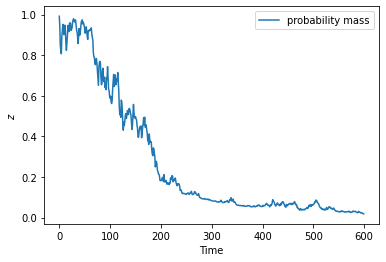

In [6]:
plt.plot(z, label='probability mass')
plt.xlabel('Time')
plt.ylabel('$z$')
plt.legend();

## Exercise 3

In [7]:
T = 50
G = np.eye(2)
C = np.sqrt(0.5)*G
H = np.sqrt(0.3)*G
A = np.array([[0.5, 0.4],
        [0.6, 0.3]])
sigma_0 = np.array([[0.9, 0.3],
           [0.3, 0.9]])
x_hat = np.array([8, 8])
x_0 = np.array([0, 0])

R = np.matmul(H, H)
Q = np.matmul(C, C)

In [8]:
ss = qe.LinearStateSpace(A, C, G, H)
kf = qe.Kalman(ss, x_hat, sigma_0)
x, y = ss.simulate(T)
x, y = list(zip(*x)), list(zip(*y))
kf_pre = np.zeros(T-1)
best_pre = np.zeros(T-1)
for i in range(T-1):
  obs = y[i]
  kf.update(obs)
  kf_pre[i] = np.sum((x[i+1] - kf.x_hat.flatten())**2)
  best_pre[i] = np.sum((x[i+1] - np.matmul(A, x[i]))**2)

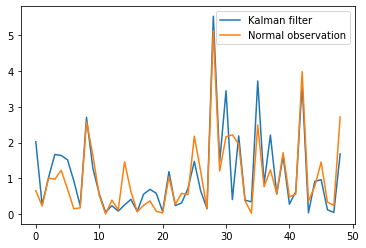

In [9]:
for pre, label in zip([kf_pre, best_pre],
             ['Kalman filter', 'Normal observation']):
  plt.plot(pre, label=label)
plt.legend();